<a href="https://colab.research.google.com/github/kinzahassan15/msc_thesis/blob/main/Tuberculosis_Chest_Xray_MSC_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip  /content/drive/MyDrive/tuberculosis_chest_xray_database.zip -d ./datasets

Archive:  /content/drive/MyDrive/tuberculosis_chest_xray_database.zip
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1

In [3]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to the dataset
base_dir = './datasets/TB_Chest_Radiography_Database'

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


# Load training data
train_generator = train_datagen.flow_from_directory(
    './datasets/TB_Chest_Radiography_Database',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = valid_datagen.flow_from_directory(
    './datasets/TB_Chest_Radiography_Database',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

print('Data loaded successfully.')

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Data loaded successfully.


#RESNET

In [5]:
# Load the ResNet50 model, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Freeze the layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Instantiate ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print('Model compiled successfully.')



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Model compiled successfully.


In [8]:
#train the model
resnet_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    epochs=50
)


print('Model trained successfully.')

Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.9144 - loss: 0.2127 - val_accuracy: 0.8964 - val_loss: 0.2550 - learning_rate: 0.0010
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - accuracy: 0.9285 - loss: 0.1996 - val_accuracy: 0.8952 - val_loss: 0.2542 - learning_rate: 0.0010
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - accuracy: 0.9304 - loss: 0.1999 - val_accuracy: 0.8821 - val_loss: 0.2731 - learning_rate: 0.0010
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - accuracy: 0.9290 - loss: 0.1990 - val_accuracy: 0.8821 - val_loss: 0.2612 - learning_rate: 0.0010
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - accuracy: 0.9254 - loss: 0.2019 - val_accuracy: 0.8964 - val_loss: 0.2568 - learning_rate: 0.0010
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.9193 - loss: 0.2120 - val_accuracy: 0.8964 - val_loss: 0.2526 - learning_rate: 0.0010
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.9300 - l

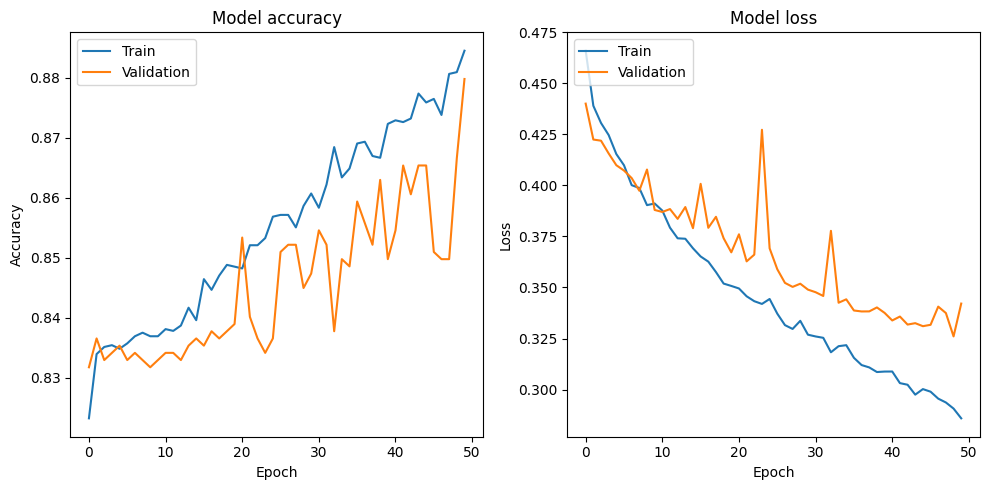

In [ ]:
 # Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

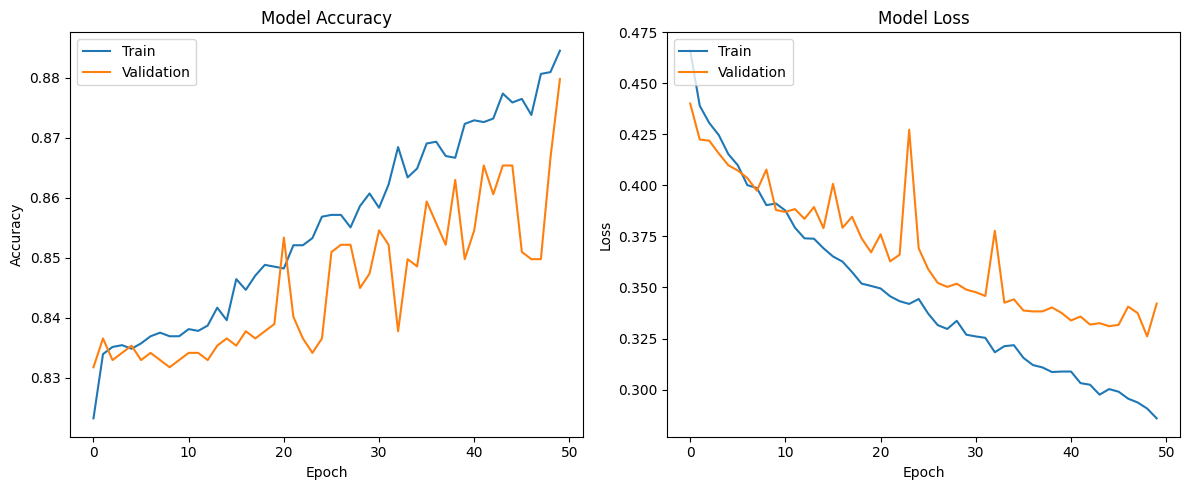

In [ ]:

def plot_performance(history):
    metrics = ['accuracy', 'loss']
    titles = ['Model Accuracy', 'Model Loss']
    y_labels = ['Accuracy', 'Loss']

    plt.figure(figsize=(12, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.plot(history.history[metric], label='Train')
        plt.plot(history.history[f'val_{metric}'], label='Validation')
        plt.title(titles[i])
        plt.xlabel('Epoch')
        plt.ylabel(y_labels[i])
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming 'resnet_history' is the variable storing the training history
plot_performance(history)


105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8991 - loss: 0.2404
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step
Accuracy: 0.7714285714285715
Precision: 0.7303374252051076
Recall: 0.7714285714285715
F1 Score: 0.7483658141714649


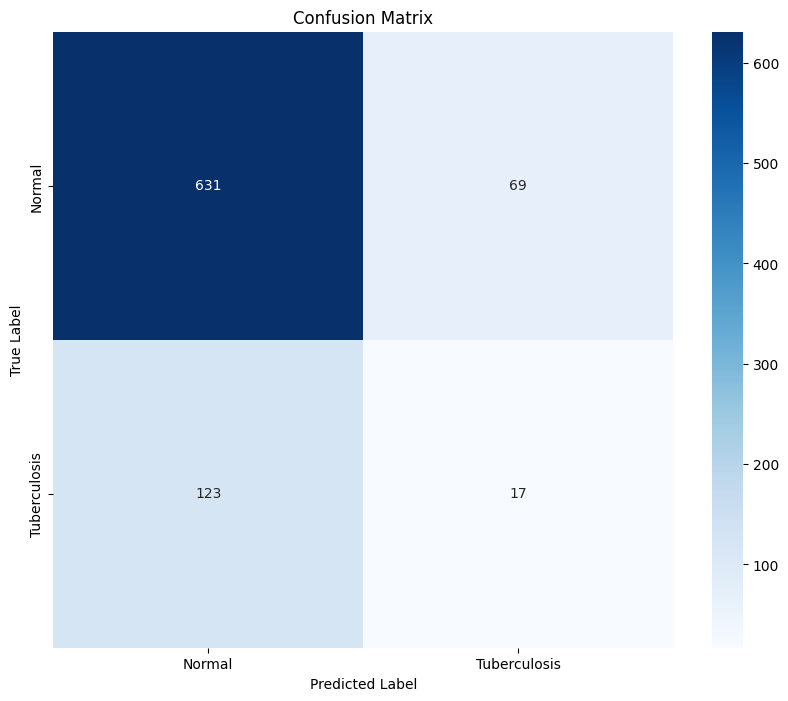

ROC-AUC: 0.4990816326530612
Model evaluation completed.


In [9]:


# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)

# Get the true labels and predictions
validation_generator.reset()
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1)

# Plot confusion matrix with label names
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate ROC-AUC (if it's a binary classification problem)
if train_generator.num_classes == 2:
    roc_auc = roc_auc_score(y_true, y_pred_prob[:, 1])
    print('ROC-AUC:', roc_auc)
else:
    print('ROC-AUC is not applicable for multi-class classification.')

print('Model evaluation completed.')

In [ ]:
,### https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/data

#CAE


In [ ]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to the dataset
base_dir = './datasets/TB_Chest_Radiography_Database'

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='input',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='input',
    subset='validation'
)

print('Data loaded successfully.')

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Data loaded successfully.


In [ ]:
# Step 3: Define the Convolutional Autoencoder model architecture using TensorFlow

from tensorflow.keras.layers import Conv2DTranspose, Input, MaxPooling2D, UpSampling2D, Conv2D # Import the Input layer
from tensorflow.keras.models import Model

# Define the input shape
input_img = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output layer
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Define the model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the model summary
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 56, 56, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 112, 112, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,366,659 (5.21 MB)

 Trainable params: 1,366,659 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Train the Convolutional Autoencoder model on the preprocessed dataset

# Define the number of epochs
epochs = 50
# Train the model
epochs = 50
history_CAE = autoencoder.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the trained model
autoencoder.save('convolutional_autoencoder.h5')

print('Model training complete and saved as convolutional_autoencoder.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - loss: 0.5994 - val_loss: 0.5515
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - loss: 0.5460 - val_loss: 0.5498
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - loss: 0.5429 - val_loss: 0.5478
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - loss: 0.5405 - val_loss: 0.5471
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - loss: 0.5413 - val_loss: 0.5479
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - loss: 0.5409 - val_loss: 0.5497
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - loss: 0.5391 - val_loss: 0.5477
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - loss: 0.5396 - val_loss: 0.5460
Epoch 9/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - loss: 0.5389 - val_loss: 0.5458
Epoch 10/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - loss: 0.5378 - val_loss: 0.5457
Epoch 11/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - loss: 0.5376 - val_loss: 0.5463
Epoch 12/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/ste

Model training complete and saved as convolutional_autoencoder.h5


Found 840 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


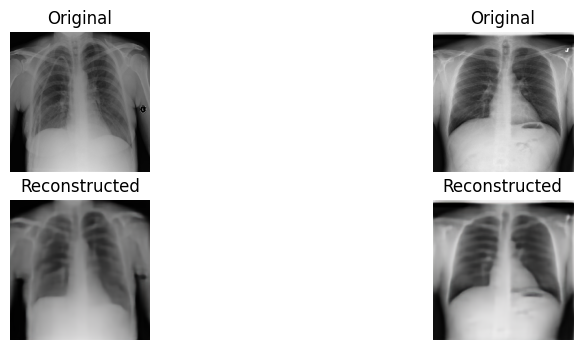

Evaluation complete.


In [ ]:
# Step 5: Evaluate the performance of the trained Convolutional Autoencoder model

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Define the path to the dataset directory
dataset_dir = './datasets/TB_Chest_Radiography_Database'

#Recreate the validation data generator
image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data = image_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224), # Match the size used during training
    batch_size=32,
    class_mode='input',
    subset='validation'
)


# Get a batch of validation data
val_batch = next(iter(val_data))

# Get the original images and the reconstructed images
original_images = val_batch[0]
reconstructed_images = autoencoder.predict(original_images)

# Plot the original and reconstructed images
n = 2  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(original_images[i])
    plt.title('Original')
    plt.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()

print('Evaluation complete.')